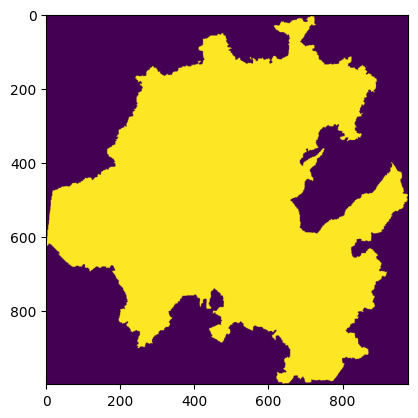

In [77]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

with rasterio.open('Datos\\Procesados\\Antiguos\\Raster\\Agencias de cobranza y comunicaciones.tiff') as src:
    data = src.read(
        out_shape=(src.count, src.height, src.width),
        resampling=Resampling.nearest
    )

    transform = src.transform

plt.imshow(data[0], cmap='viridis') 

In [78]:
import os
assets_dir = 'Datos\\Procesados\\Antiguos\\Imagenes Raster'
common_tiff_files = [f for f in os.listdir(assets_dir) if os.path.isdir(os.path.join(assets_dir, f))]
folders = '2025A'

assets_dir = 'Datos\\Procesados\\Actualizados\\'
activities_dir = os.path.join("Datos\\Procesados\\Actualizados", 'imagenes') 
os.makedirs(activities_dir, exist_ok=True) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from rasterio.enums import Resampling

colormap = plt.cm.turbo

for tiff_file in common_tiff_files:
    base_name     = os.path.splitext(tiff_file)[0]
    output_folder = os.path.join(activities_dir, base_name)
    # Existe la carpeta de salida
    os.makedirs(output_folder, exist_ok=True)
    year_folder = folders
    src_path = os.path.join(assets_dir, year_folder, tiff_file + '.tiff')
    print(src_path) 
    if not os.path.exists(src_path):
        # Si no existe (aunque en teoría common_tiff_files lo garantiza), lo saltamos
        continue

    print(src_path) 

    # Leemos el TIFF
    with rasterio.open(src_path) as src:
        data = src.read(
            out_shape=(src.count, src.height, src.width),
            resampling=Resampling.nearest
        )
    # Ajustes de tipo y escala
    data = (data * 1000).astype(np.uint16)
    norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

    # Mapeo de colores
    mapped = colormap(norm(data[0]))
    # Definimos alfa donde haya datos (> mínimo)
    mask = (data[0] > data.min())
    mapped[..., 3] = mask.astype(np.uint8)

    # Guardamos el PNG 
    out_png = os.path.join(output_folder, f"{year_folder}.png")
    plt.imsave(out_png, mapped)

Datos\Procesados\Actualizados\2025A\Agencias de cobranza y comunicaciones.tiff
Datos\Procesados\Actualizados\2025A\Agencias de cobranza y comunicaciones.tiff


C:\Users\eagel\AppData\Local\Temp\ipykernel_9256\362497308.py:29: RuntimeWarning: overflow encountered in multiply
  data = (data * 1000).astype(np.uint16)
C:\Users\eagel\AppData\Local\Temp\ipykernel_9256\362497308.py:29: RuntimeWarning: invalid value encountered in cast
  data = (data * 1000).astype(np.uint16)


Datos\Procesados\Actualizados\2025A\Alimentos y bebidas.tiff
Datos\Procesados\Actualizados\2025A\Alimentos y bebidas.tiff
Datos\Procesados\Actualizados\2025A\Alquileres diversos.tiff
Datos\Procesados\Actualizados\2025A\Alquileres diversos.tiff
Datos\Procesados\Actualizados\2025A\Asociaciones y organizaciones civiles.tiff
Datos\Procesados\Actualizados\2025A\Asociaciones y organizaciones civiles.tiff
Datos\Procesados\Actualizados\2025A\Banca y seguros.tiff
Datos\Procesados\Actualizados\2025A\Banca y seguros.tiff
Datos\Procesados\Actualizados\2025A\Comercio minorista diverso.tiff
Datos\Procesados\Actualizados\2025A\Comercio minorista diverso.tiff
Datos\Procesados\Actualizados\2025A\Comunicaciones y transportes paqueteria.tiff
Datos\Procesados\Actualizados\2025A\Comunicaciones y transportes paqueteria.tiff
Datos\Procesados\Actualizados\2025A\Construccion.tiff
Datos\Procesados\Actualizados\2025A\Construccion.tiff
Datos\Procesados\Actualizados\2025A\Consultorio y otros servicios medicos.tiff

In [ ]:
colormap = plt.cm.turbo

with rasterio.open("Datos/Procesados/Antiguos/Raster/Agencias de cobranza y comunicaciones.tiff") as src:
            data = src.read(
                out_shape=(src.count, src.height, src.width),
                resampling=Resampling.nearest
            )

            
# Ajustes de tipo y escala
data = (data * 1000).astype(np.uint16)
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

# Mapeo de colores
mapped = colormap(norm(data[0]))
# Definimos alfa donde haya datos (> mínimo)
mask = (data[0] > data.min())
mapped[..., 3] = mask.astype(np.uint8)

# Guardamos el PNG 
out_png = os.path.join(output_folder, f"{year_folder}.png")


C:\Users\eagel\AppData\Local\Temp\ipykernel_9256\2465329254.py:11: RuntimeWarning: overflow encountered in multiply
  data = (data * 1000).astype(np.uint16)
C:\Users\eagel\AppData\Local\Temp\ipykernel_9256\2465329254.py:11: RuntimeWarning: invalid value encountered in cast
  data = (data * 1000).astype(np.uint16)


In [85]:
output_folder

'Datos\\Procesados\\Actualizados\\imagenes\\Turismo'

In [9]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.colors as mcolors

src_path1 = 'Datos/Procesados/Actualizados/2025A/Agencias de cobranza y comunicaciones.tiff'
src_path = 'Datos/Procesados/Antiguos/Raster/Agencias de cobranza y comunicaciones.tiff'

colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'turbo',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'YlGn', 'YlGnBu', 'OrRd', 'PuRd',
    'RdPu', 'BuPu', 'PuBu', 'PuBuGn', 'BuGn', 'GnBu',
    'hot', 'afmhot', 'gist_heat', 'bone', 'pink',
    'spring', 'summer', 'autumn', 'winter', 'cool', 'copper'
]

# Leemos el TIFF solo una vez
with rasterio.open(src_path1) as src:
    data = src.read(
        out_shape=(src.count, src.height, src.width),
        resampling=Resampling.nearest
    )
    transform = src.transform

# Ajustes de tipo y escala
data = (data * 100000).astype(np.uint16)
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

# Aseguramos que la carpeta de salida exista
os.makedirs("paletas", exist_ok=True)

for color in colormaps:
    colormap = plt.get_cmap(color)
    
    mapped = colormap(norm(data[0]))
    
    # Definimos alfa donde haya datos (> mínimo)
    mask = (data[0] > data.min())
    mapped[..., 3] = mask.astype(np.uint8)

    out_png = os.path.join("paletas", f"{color}.png")
    plt.imsave(out_png, mapped)

C:\Users\eagel\AppData\Local\Temp\ipykernel_3820\2468892859.py:29: RuntimeWarning: overflow encountered in multiply
  data = (data * 100000).astype(np.uint16)
C:\Users\eagel\AppData\Local\Temp\ipykernel_3820\2468892859.py:29: RuntimeWarning: invalid value encountered in cast
  data = (data * 100000).astype(np.uint16)


In [ ]:
import rasterio
from rasterio.enums import Resampling
import numpy as np

p = 'Datos/Procesados/Actualizados/2025A/Agencias de cobranza y comunicaciones.tiff'
with rasterio.open(p) as src:
    print("profile:", src.profile)
    print("count, width, height:", src.count, src.width, src.height)
    print("dtypes:", src.dtypes)
    print("nodata:", src.nodata)
    band0 = src.read(1)
    print("min, max, unique (sample):", band0.min(), band0.max(), np.unique(band0.ravel())[:10])
    mask = src.read_masks(1)
    print("mask unique:", np.unique(mask)[:10])  # 0 para nodata, 255 para válido


profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 978, 'height': 998, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 14N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32614"]]'), 'transform': Affine(200.00000000000006, 0.0, 410236.10446,
       0.0, -200.0, 2366550.0), 'blockxsize': 978, 'blockysize': 2, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
count, width, height: 1 978 998
dtypes: ('float32',)
nodata: -3.3999

In [4]:
import rasterio
from rasterio.enums import Resampling
import numpy as np

p = 'Datos/Procesados/Antiguos/Raster/Agencias de cobranza y comunicaciones.tiff'
with rasterio.open(p) as src:
    print("profile:", src.profile)
    print("count, width, height:", src.count, src.width, src.height)
    print("dtypes:", src.dtypes)
    print("nodata:", src.nodata)
    band0 = src.read(1)
    print("min, max, unique (sample):", band0.min(), band0.max(), np.unique(band0.ravel())[:10])
    mask = src.read_masks(1)
    print("mask unique:", np.unique(mask)[:10])  # 0 para nodata, 255 para válido

profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 978, 'height': 998, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 14N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32614"]]'), 'transform': Affine(200.00000000000006, 0.0, 410236.10446,
       0.0, -200.0, 2366550.0), 'blockxsize': 978, 'blockysize': 2, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
count, width, height: 1 978 998
dtypes: ('float32',)
nodata: -3.3999

# Sugeriencia ChatGpt

In [ ]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.colors as mcolors

src_path = 'Datos/Procesados/Actualizados/2025A/Agencias de cobranza y comunicaciones.tiff'
colormaps = ['turbo', 'viridis', 'plasma', 'inferno']
os.makedirs("paletas", exist_ok=True)

with rasterio.open(src_path) as src:
    band = src.read(1, out_shape=(src.height, src.width), resampling=Resampling.nearest).astype(float)
    mask_valid = src.read_masks(1).astype(bool)          # 255 válidos, 0 nodata
    valid_vals = band[mask_valid]

# --- opción A: umbral absoluto (elige según tus datos) ---
umbral_abs = 1e-7
mask_interest_abs = (band > umbral_abs) & mask_valid

# --- opción B: umbral por percentil (quita el ruido de fondo) ---
p = 95   # muestra solo valores por encima del percentil 95
umbral_pct = np.percentile(valid_vals, p)
mask_interest_pct = (band > umbral_pct) & mask_valid

# elige la máscara que prefieras:
mask_interest = mask_interest_pct  # o mask_interest_abs

# normalizar usando sólo valores válidos (o sólo los de interés si prefieres)
if mask_interest.sum() > 0:
    norm_min = float(band[mask_interest].min())
    norm_max = float(band[mask_interest].max())
else:
    norm_min = float(valid_vals.min())
    norm_max = float(valid_vals.max())

if norm_min == norm_max:
    norm_max = norm_min + 1.0

norm = mcolors.Normalize(vmin=norm_min, vmax=norm_max)

# preparar banda para mapeo (a los píxeles no de interés les damos vmin)
band_for_cmap = band.copy()
band_for_cmap[~mask_interest] = norm_min

for cmap_name in colormaps:
    cmap = plt.get_cmap(cmap_name)
    mapped = cmap(norm(band_for_cmap))   # (H, W, 4), floats 0..1
    # alfa: 1 donde interesa, 0 donde no
    mapped[..., 3] = mask_interest.astype(float)

    out_png = os.path.join("paletas", f"{cmap_name}_interest.png")
    plt.imsave(out_png, mapped)
